# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


## Load the Dataset

In [2]:
df = pd.read_csv('../Data\merged_cleaned.csv', index_col=[0], parse_dates=[0])

In [3]:
df.head()

Gesamt (Netzlast) [MWh] Berechnete Auflösungen  \
Date                                                                  
2018-11-01 00:00:00                                       4887950.0   
2018-11-01 01:00:00                                       4731250.0   
2018-11-01 02:00:00                                       4609375.0   
2018-11-01 03:00:00                                       4671050.0   
2018-11-01 04:00:00                                       4762425.0   

                     Deutschland/Luxemburg [€/MWh] Originalauflösungen  \
Date                                                                     
2018-11-01 00:00:00                                             4086.0   
2018-11-01 01:00:00                                             4110.0   
2018-11-01 02:00:00                                             4059.0   
2018-11-01 03:00:00                                             4009.0   
2018-11-01 04:00:00                                             3911.0   

                     Biomasse [MWh] Berechnete Auflösungen  \
Date                                                         
2018-11-01 00:00:00                               475475.0   
2018-11-01 01:00:00                               474125.0   
2018-11-01 02:00:00                               473325.0   
2018-11-01 03:00:00                               472525.0   
2018-11-01 04:00:00                               471500.0   

                     Wasserkraft [MWh] Berechnete Auflösungen  \
Date                                                            
2018-11-01 00:00:00                                  158300.0   
2018-11-01 01:00:00                                  158750.0   
2018-11-01 02:00:00                                  156750.0   
2018-11-01 03:00:00                                  155000.0   
2018-11-01 04:00:00                                  153575.0   

                     Wind Offshore [MWh] Berechnete Auflösungen  \
Date                                                              
2018-11-01 00:00:00                                    272100.0   
2018-11-01 01:00:00                                    267800.0   
2018-11-01 02:00:00                                    283675.0   
2018-11-01 03:00:00                                    296850.0   
2018-11-01 04:00:00                                    276525.0   

                     Wind Onshore [MWh] Berechnete Auflösungen  \
Date                                                             
2018-11-01 00:00:00                                  1162850.0   
2018-11-01 01:00:00                                  1102900.0   
2018-11-01 02:00:00                                  1102500.0   
2018-11-01 03:00:00                                  1048025.0   
2018-11-01 04:00:00                                  1087125.0   

                     Photovoltaik [MWh] Berechnete Auflösungen  \
Date                                                             
2018-11-01 00:00:00                                        0.0   
2018-11-01 01:00:00                                        0.0   
2018-11-01 02:00:00                                        0.0   
2018-11-01 03:00:00                                        0.0   
2018-11-01 04:00:00                                        0.0   

                     Sonstige Erneuerbare [MWh] Berechnete Auflösungen  \
Date                                                                     
2018-11-01 00:00:00                                            15300.0   
2018-11-01 01:00:00                                            15300.0   
2018-11-01 02:00:00                                            15300.0   
2018-11-01 03:00:00                                            15250.0   
2018-11-01 04:00:00                                            15275.0   

                     Kernenergie [MWh] Berechnete Auflösungen  \
Date                                                            
2018-11-01 00:00:00                                  793300.0   
201

## Data dimensions and description:

In [4]:
# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())
print(df.info())


Number of samples: 52620
Number of features: 32
Example data:
                     Gesamt (Netzlast) [MWh] Berechnete Auflösungen  \
Date                                                                  
2018-11-01 00:00:00                                       4887950.0   
2018-11-01 01:00:00                                       4731250.0   
2018-11-01 02:00:00                                       4609375.0   
2018-11-01 03:00:00                                       4671050.0   
2018-11-01 04:00:00                                       4762425.0   

                     Deutschland/Luxemburg [€/MWh] Originalauflösungen  \
Date                                                                     
2018-11-01 00:00:00                                             4086.0   
2018-11-01 01:00:00                                             4110.0   
2018-11-01 02:00:00                                             4059.0   
2018-11-01 03:00:00                                             4009.0

In [5]:
df.columns

Index(['Gesamt (Netzlast) [MWh] Berechnete Auflösungen',
       'Deutschland/Luxemburg [€/MWh] Originalauflösungen',
       'Biomasse [MWh] Berechnete Auflösungen',
       'Wasserkraft [MWh] Berechnete Auflösungen',
       'Wind Offshore [MWh] Berechnete Auflösungen',
       'Wind Onshore [MWh] Berechnete Auflösungen',
       'Photovoltaik [MWh] Berechnete Auflösungen',
       'Sonstige Erneuerbare [MWh] Berechnete Auflösungen',
       'Kernenergie [MWh] Berechnete Auflösungen',
       'Braunkohle [MWh] Berechnete Auflösungen',
       'Steinkohle [MWh] Berechnete Auflösungen',
       'Erdgas [MWh] Berechnete Auflösungen',
       'Pumpspeicher [MWh] Berechnete Auflösungen_y',
       'Sonstige Konventionelle [MWh] Berechnete Auflösungen', 'date', 'hour',
       'dayofweek', 'day_name', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'date_offset', 'hour_sin', 'hour_cos', 'dayofweek_sin',
       'dayofweek_cos', 'month_sin', 'month_cos', 'dayofyear_sin',
       'dayofyear_co

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


In [6]:
import plotly.express as px

# Create the plot using Plotly Express
fig = px.line(df, 
              x=df.index, 
              y='Gesamt (Netzlast) [MWh] Berechnete Auflösungen', 
              title='Gesamt Netzlast over the Years', 
              labels={'Gesamt (Netzlast) [MWh] Berechnete Auflösungen': 'Gesamt Netzlast [MWh]', 
                      'date': 'Date'})

# Show the plot
fig.show()


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the load data to the left y-axis
fig.add_trace(
    go.Scatter(x=df.index, 
               y=df['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'], 
               mode='lines', 
               name='Load (Netzlast)', 
               line=dict(color='blue')),
    secondary_y=False
)

# Add the price data to the right y-axis
fig.add_trace(
    go.Scatter(x=df.index, 
               y=df['Deutschland/Luxemburg [€/MWh] Originalauflösungen'], 
               mode='lines', 
               name='Price (€)', 
               line=dict(color='red')),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title_text="Load and Price over Entire Time Period",
    xaxis_title="Date",
    yaxis_title="Load (MWh)",
    yaxis2_title="Price (€)",
    showlegend=True
)

# Show the plot
fig.show()


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for two weeks
df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

# Create subplots with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the load data to the left y-axis
fig.add_trace(
    go.Scatter(x=df_filtered.index, 
               y=df_filtered['Gesamt (Netzlast) [MWh] Berechnete Auflösungen'], 
               mode='lines', 
               name='Load (Netzlast)', 
               line=dict(color='blue')),
    secondary_y=False
)

# Add the price data to the right y-axis
fig.add_trace(
    go.Scatter(x=df_filtered.index, 
               y=df_filtered['Deutschland/Luxemburg [€/MWh] Originalauflösungen'], 
               mode='lines', 
               name='Price (€)', 
               line=dict(color='red')),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title_text="Load and Price over Two Weeks",
    xaxis_title="Date",
    yaxis_title="Load (MWh)",
    yaxis2_title="Price (€)",
    showlegend=True
)

# Show the plot
fig.show()


In [20]:
import plotly.express as px
import pandas as pd

# Ensure that the 'date' column is in datetime format if it's not already
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as index
df.set_index('date', inplace=True)

# Group by month and aggregate the energy production for each category
monthly_renewables = df[renewables].resample('M').sum()
monthly_conventional_energy = df[conventional_energy].resample('M').sum()
monthly_other_renewables = df[other_renewables].resample('M').sum()

# Create a plot for each category
fig_renewables = px.bar(monthly_renewables, x=monthly_renewables.index, y=monthly_renewables.columns,
                         title="Monthly Renewable Energy Production",
                         labels={"value": "Energy Production (MWh)", "date": "Month"},
                         barmode="stack")
fig_renewables.show()

fig_conventional_energy = px.bar(monthly_conventional_energy, x=monthly_conventional_energy.index, y=monthly_conventional_energy.columns,
                                 title="Monthly Conventional Energy Production",
                                 labels={"value": "Energy Production (MWh)", "date": "Month"},
                                 barmode="stack")
fig_conventional_energy.show()

fig_other_renewables = px.bar(monthly_other_renewables, x=monthly_other_renewables.index, y=monthly_other_renewables.columns,
                              title="Monthly Other Energy Production",
                              labels={"value": "Energy Production (MWh)", "date": "Month"},
                              barmode="stack")
fig_other_renewables.show()


C:\Users\TimPr\AppData\Local\Temp\ipykernel_12216\1836959224.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\TimPr\AppData\Local\Temp\ipykernel_12216\1836959224.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\TimPr\AppData\Local\Temp\ipykernel_12216\1836959224.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


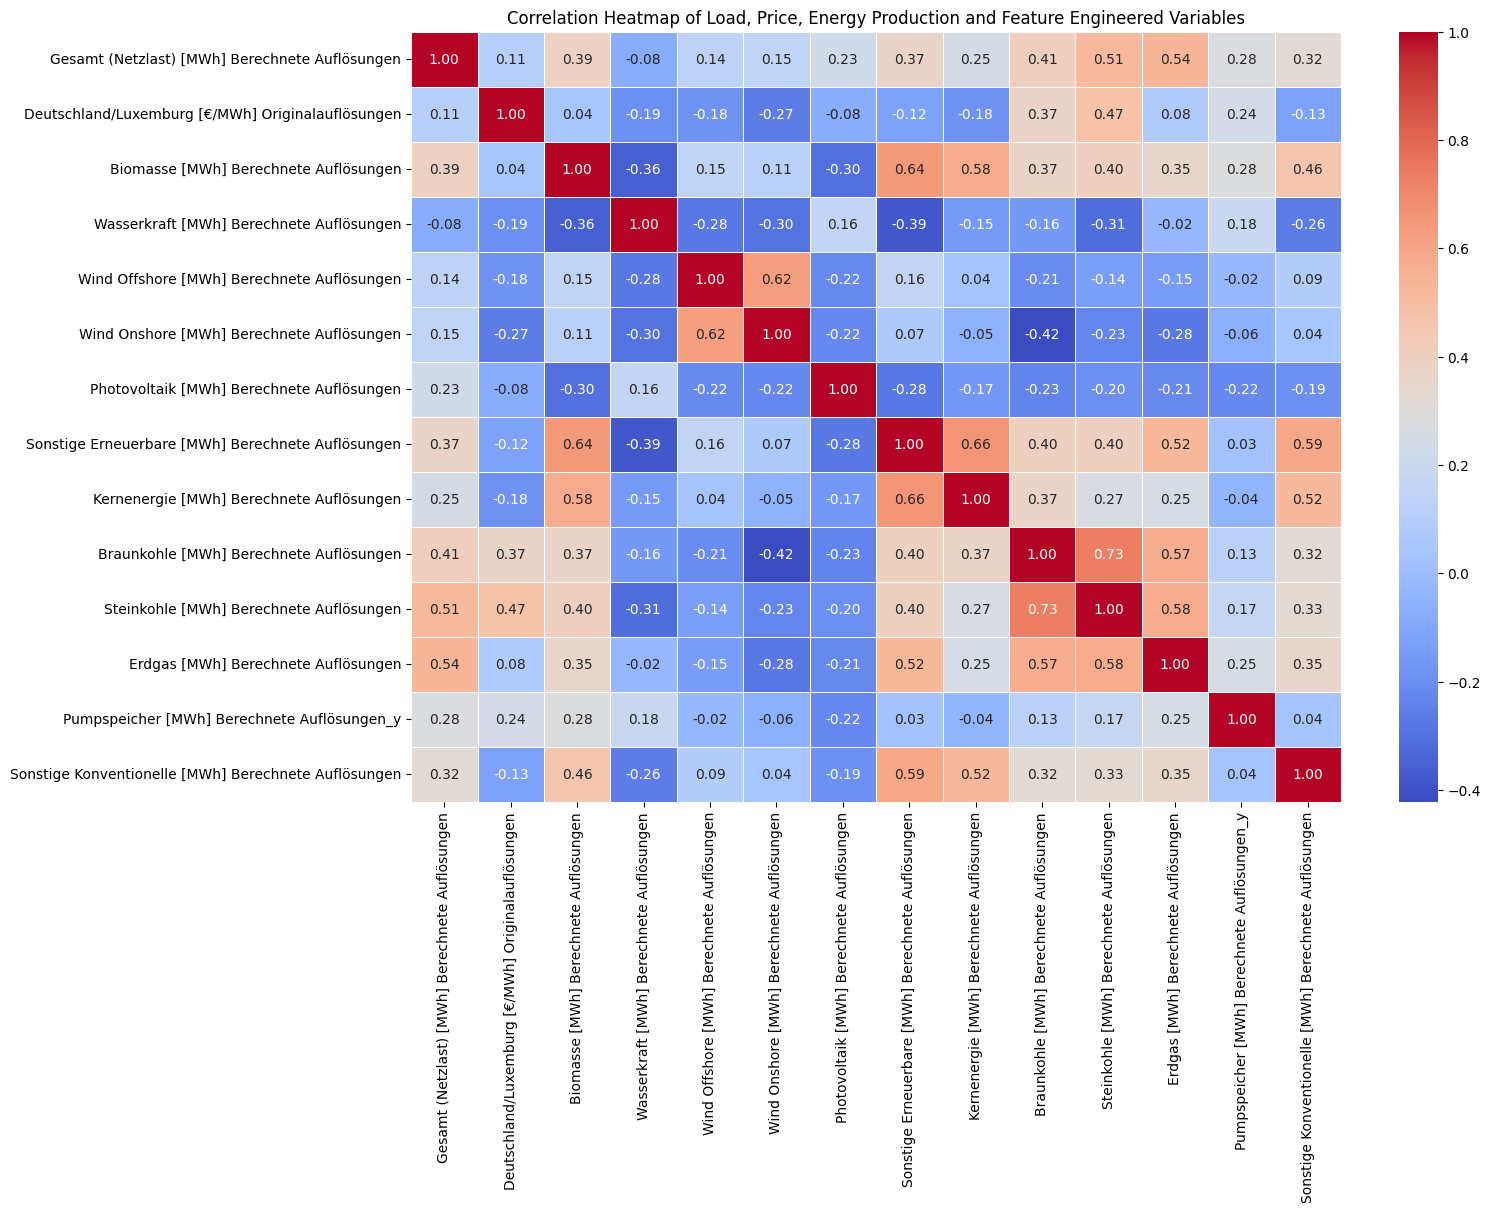

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant columns for correlation
all_columns = [
    'Gesamt (Netzlast) [MWh] Berechnete Auflösungen',
    'Deutschland/Luxemburg [€/MWh] Originalauflösungen',
    'Biomasse [MWh] Berechnete Auflösungen',
    'Wasserkraft [MWh] Berechnete Auflösungen',
    'Wind Offshore [MWh] Berechnete Auflösungen',
    'Wind Onshore [MWh] Berechnete Auflösungen',
    'Photovoltaik [MWh] Berechnete Auflösungen',
    'Sonstige Erneuerbare [MWh] Berechnete Auflösungen',
    'Kernenergie [MWh] Berechnete Auflösungen',
    'Braunkohle [MWh] Berechnete Auflösungen',
    'Steinkohle [MWh] Berechnete Auflösungen',
    'Erdgas [MWh] Berechnete Auflösungen',
    'Pumpspeicher [MWh] Berechnete Auflösungen_y',
    'Sonstige Konventionelle [MWh] Berechnete Auflösungen'
]

# Compute the correlation matrix for all columns
corr_matrix_all = df[all_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Load, Price, Energy Production and Feature Engineered Variables')
plt.show()
